In [213]:
import pandas as pd
from prophet import Prophet
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt

In [214]:
df=pd.read_csv(r'C:\Users\mhuza\Desktop\MINI-Projects-ML\Driectory\AEP_hourly.csv')
df.shape

(121273, 2)

In [215]:
print(df.isnull().sum())
df.head()

Datetime    0
AEP_MW      0
dtype: int64


,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


In [216]:
df['Datetime']=pd.to_datetime(df['Datetime'],format='%Y-%m-%d %H:%M:%S')
df.head()

,Datetime,AEP_MW
0,2004-12-31 01:00:00,13478.0
1,2004-12-31 02:00:00,12865.0
2,2004-12-31 03:00:00,12577.0
3,2004-12-31 04:00:00,12517.0
4,2004-12-31 05:00:00,12670.0


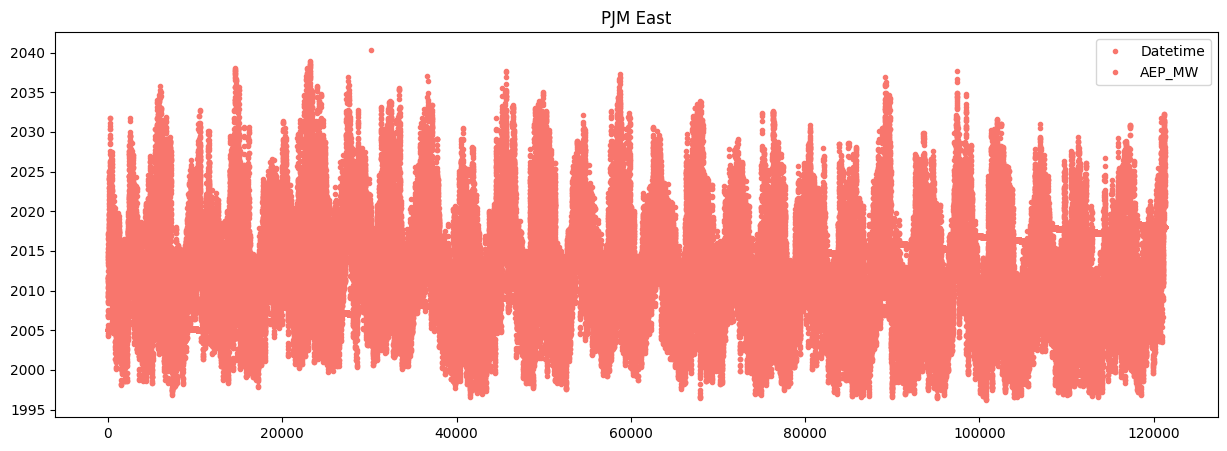

In [ ]:

color_pal = ["#F8766D", "#D39200", "#93AA00",
             "#00BA38", "#2300C1", "#00B9E3",
             "#619CFF", "#DB72FB"]
df.plot(style='.', figsize=(15,5), color=color_pal[0], title='PJM East')
plt.show()

In [ ]:
#  the data is already arranged by date
df['y']=df['AEP_MW']
df.index=df['Datetime']
df=df.drop(['AEP_MW','Datetime'],axis=1).copy()
df.head()


,y
Datetime,
2004-12-31 01:00:00,13478.0
2004-12-31 02:00:00,12865.0
2004-12-31 03:00:00,12577.0
2004-12-31 04:00:00,12517.0
2004-12-31 05:00:00,12670.0


In [219]:
df['ds']=df.index

c:\Users\mhuza\AppData\Local\Programs\Python\Python312\Lib\site-packages\matplotlib\cbook.py:1719: UserWarning: Warning: converting a masked element to nan.
  return math.isfinite(val)


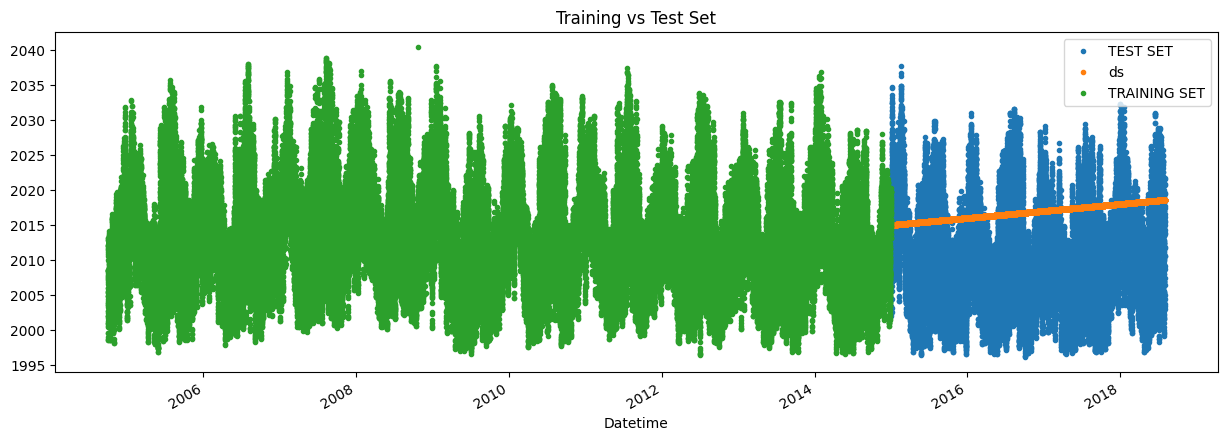

In [226]:


# size= 2000
split_date = '01-Jan-2015'
train = df.loc[df.index <= split_date].copy()
test = df.loc[df.index > split_date].copy()
train_renamed = train.rename(columns={'y': 'TRAINING SET'})
test_renamed = test.rename(columns={'y': 'TEST SET'})
train_renamed = train_renamed.drop(columns=['ds'])
combined = test_renamed.join(train_renamed, how='outer')
combined.plot(figsize=(15, 5), title='Training vs Test Set', style='.')
plt.show()

In [227]:
model=Prophet(daily_seasonality=True,weekly_seasonality=True,yearly_seasonality=True,seasonality_prior_scale=0.9,uncertainty_samples=100)
model.fit(train)
# we will create a dataframe future containing the dates that we want to make a forecast on
future=model.make_future_dataframe(periods=len(test),freq='H')
future.head()
# This DataFrame includes:
# All the dates from your training data (because Prophet requires them)
# Plus the extra future dates you specify (periods=len(test) here) where you want predictions.
# So, if your training data ends on June 30, and periods=30, future will have dates from the start up to June 30,
# and 30 more days into July.



18:57:58 - cmdstanpy - INFO - Chain [1] start processing
18:58:33 - cmdstanpy - INFO - Chain [1] done processing
c:\Users\mhuza\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


,ds
0,2004-10-01 01:00:00
1,2004-10-01 02:00:00
2,2004-10-01 03:00:00
3,2004-10-01 04:00:00
4,2004-10-01 05:00:00


In [229]:
forecast=model.predict(future)
forecast_test = forecast[(forecast['ds'] >= test.index.min()) & (forecast['ds'] <= test.index.max())]
forecast_test.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,daily,...,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
89833,2015-01-01 01:00:00,15026.452935,12731.448139,16657.183176,15026.452935,15026.452935,-330.405920,-330.405920,-330.405920,-1526.635028,...,601.293671,601.293671,601.293671,594.935436,594.935436,594.935436,0.0,0.0,0.0,14696.047015
89834,2015-01-01 02:00:00,15026.437874,12229.517870,16133.558056,15026.437874,15026.437874,-925.131176,-925.131176,-925.131176,-2123.386656,...,602.279319,602.279319,602.279319,595.976161,595.976161,595.976161,0.0,0.0,0.0,14101.306698
89835,2015-01-01 03:00:00,15026.422813,12034.515374,15316.842600,15026.422813,15026.422813,-1266.331753,-1266.331753,-1266.331753,-2465.954756,...,602.578666,602.578666,602.578666,597.044336,597.044336,597.044336,0.0,0.0,0.0,13760.091060
89836,2015-01-01 04:00:00,15026.407752,12111.949443,15535.691276,15026.407752,15026.407752,-1304.576075,-1304.576075,-1304.576075,-2504.914510,...,602.198476,602.198476,602.198476,598.139959,598.139959,598.139959,0.0,0.0,0.0,13721.831677
89837,2015-01-01 05:00:00,15026.392691,11839.672190,15778.318272,15026.392691,15026.392691,-1007.724321,-1007.724321,-1007.724321,-2208.140888,...,601.153544,601.153544,601.153544,599.263023,599.263023,599.263023,0.0,0.0,0.0,14018.668370


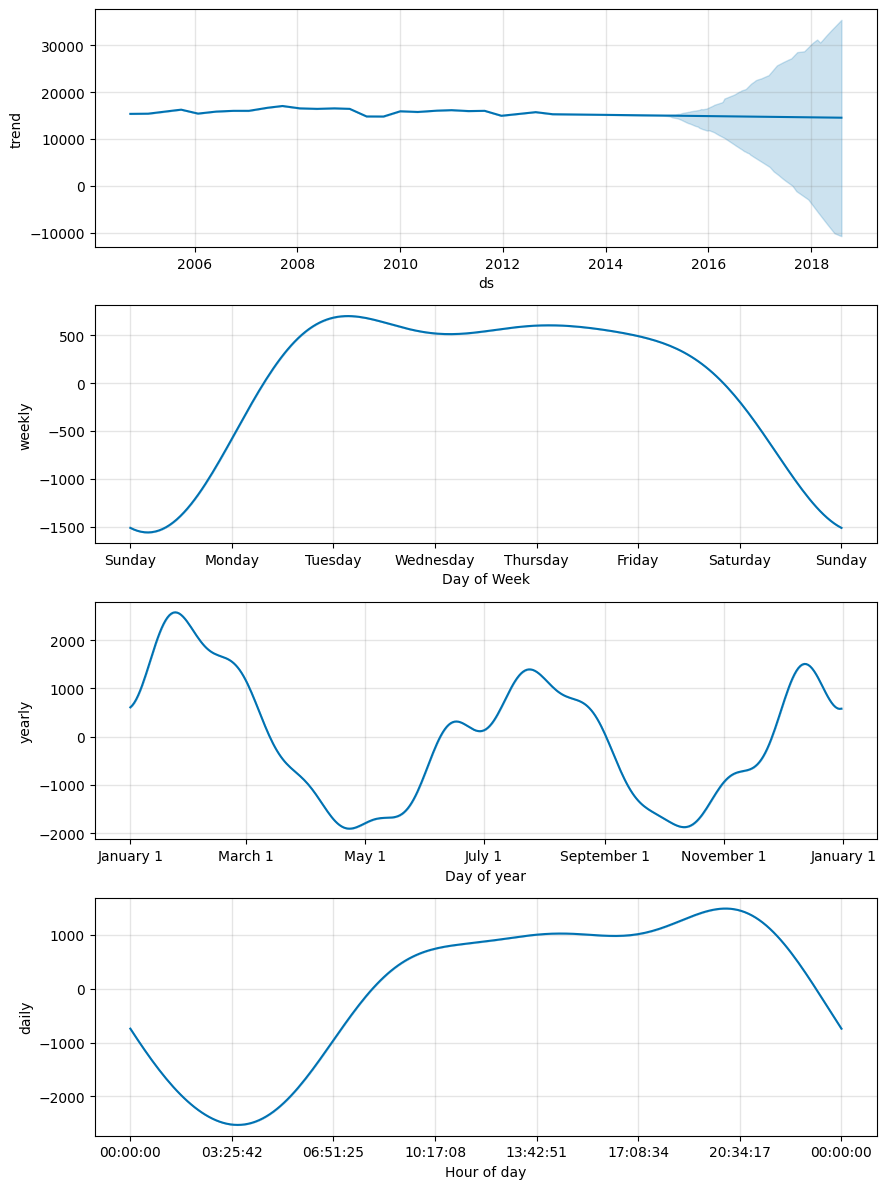

In [230]:
fig=model.plot_components(forecast)
plt.show()

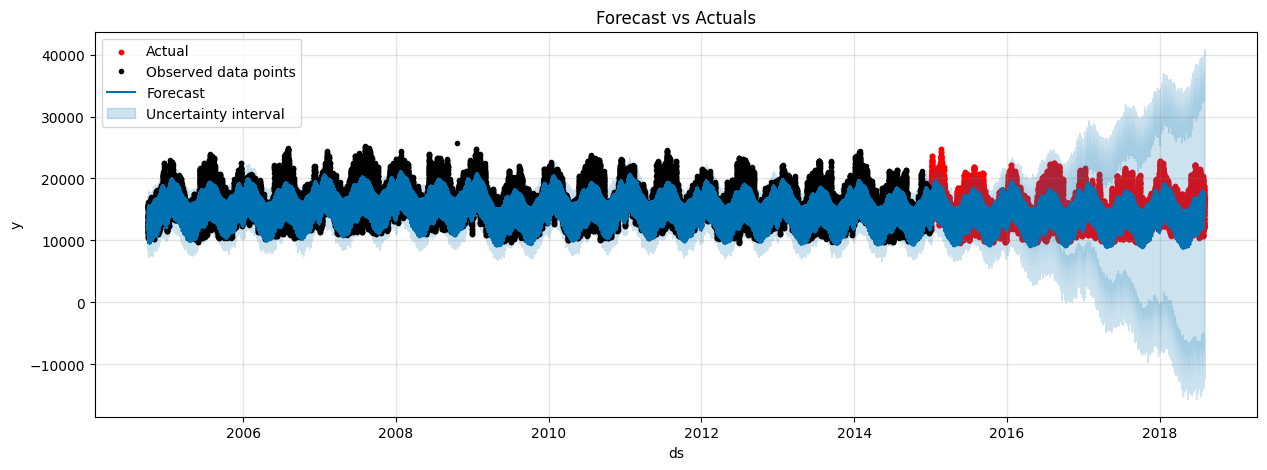

In [ ]:
f, ax = plt.subplots(1, figsize=(15, 5))  # create figure and axis with desired size

ax.scatter(test.index, test['y'], color='red', s=10, label='Actual')

model.plot(forecast, ax=ax)

ax.legend()
ax.set_title('Forecast vs Actuals')

plt.show()





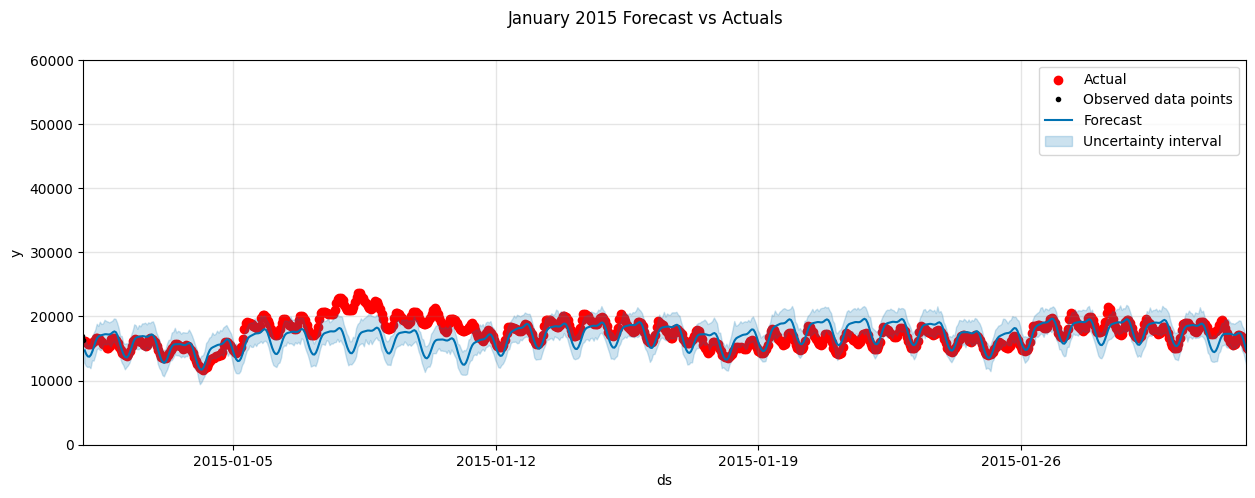

In [ ]:


f, ax = plt.subplots(1, figsize=(15, 5))
f.set_figheight(5)
f.set_figwidth(15)

ax.scatter(test.index, test['y'], color='r', label='Actual')

model.plot(forecast_test, ax=ax)

ax.set_xbound(lower=pd.to_datetime('2015-01-01'),
              upper=pd.to_datetime('2015-02-01'))
ax.set_ylim(0, 60000)

plt.suptitle('January 2015 Forecast vs Actuals')
plt.legend()
plt.show()


In [ ]:
df_compare = test[['ds', 'y']].merge(forecast[['ds', 'yhat']], on='ds')
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_true = df_compare['y'].values
y_pred = df_compare['yhat'].values

mae = mean_absolute_error(y_true, y_pred)
rmse = np.sqrt(mean_squared_error(y_true, y_pred))
r2 = r2_score(y_true, y_pred)

mape = np.mean(np.abs((y_true - y_pred) / np.where(y_true == 0, 1, y_true))) * 100

print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")
print(f"R^2: {r2:.3f}")
print(f"MAPE: {mape:.2f}%")


MAE: 1336.63
RMSE: 1745.71
R^2: 0.519
MAPE: 8.88%
